# Hand of God Code 2.0 
## Hanan Basheer (20B030018)

### Importing required libraries

In [92]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import seaborn as sns
import pandas as pd
import csv
import serial
import time
import keyboard
import mouse

### Training Data extractor from csv file

In [93]:
def built(hand):
    l = []
    l1 = []
    for i in range(1, len(hand)):
       l = l + [[hand[i][0], hand[i][1], hand[i][2], hand[i][3]]]
       l1 = l1 + [[hand[i][4]]]
    return (np.array(l, dtype=list), np.array(l1, dtype=list))

reader = list(csv.reader(open(os.getcwd() + '\\Vol-Ges.csv')))
x, y = built(reader)

### Creating Linear regression model and its methods

In [94]:
model = LogisticRegression(solver = 'liblinear', C = 1, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
model.fit(x_train, y_train)

C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, random_state=0, solver='liblinear')

### Prediction functions and Testing prediction

In [95]:
# Single gesture prediction function
def predict(x):
    y = []
    for i in range(len(x)):
        y.append(model.predict([x[i]]))
    return np.array(y)

# Array buider of prediction for creating confusion matrix
def predict_array(x, y_test):
    y = []
    z = list(predict(x))
    for i in range(y_test.shape[0]):
        y += z
    return np.array(y)

#testing case
x = [[366, 293, 298, 372]]
y_pred = predict_array(x, y_test)
print("Action Predicted:", predict(x))

Action Predicted: [['Yo']]


### Confusion-matrix and heat map visualization of hand gesture database

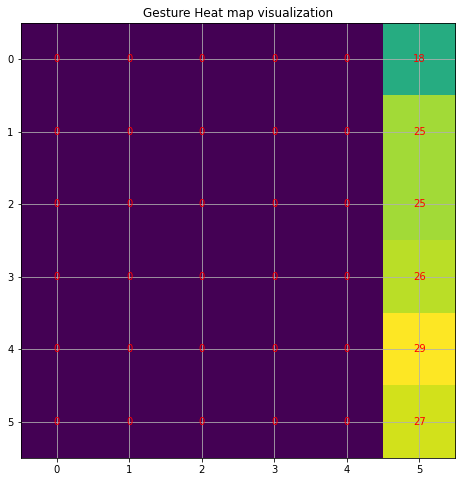

In [96]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

### Classification report and Accuracies of model

In [97]:
print("Learning score: ", model.score(x_train, y_train))
print("Predictive score: ", model.score(x_test, y_test))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Learning score:  1.0
Predictive score:  1.0
Classification Report: 
              precision    recall  f1-score   support

     Anti-Yo       0.00      0.00      0.00        18
 Closed Hand       0.00      0.00      0.00        25
   Open Hand       0.00      0.00      0.00        25
     Pointer       0.00      0.00      0.00        26
     Victory       0.00      0.00      0.00        29
          Yo       0.18      1.00      0.31        27

    accuracy                           0.18       150
   macro avg       0.03      0.17      0.05       150
weighted avg       0.03      0.18      0.05       150



C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo